**objective:**


1.   creating Modelling pipelines which can be used by Logistic Regression Model to perform predictions wheather a person has diabetes or not.
2.   Comapre prepared Model with added regularization methods and various solvers 
3. Evalutaing the models using a metric.




Importing the necessary libraries.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Reading the csv data file.

In [6]:
data = pd.read_csv('/content/pima_indian_data (2).csv')
data

,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1




1.   There are 768 rows in the dataset.
2.   There are 9 columns in the dataset.



In [7]:
data.describe()

,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Describe will only run on the features of numeric datatypes

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Number  of times pregnant   768 non-null    int64  
 1   Plasma glucose              768 non-null    int64  
 2   Diastolic blood pressure    768 non-null    int64  
 3   Triceps skinfold thickness  768 non-null    int64  
 4   serum insulin               768 non-null    int64  
 5   Body mass index             768 non-null    float64
 6   Diabetes pedigree function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Class                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


From the above info we can see that there are many non-null values and we can also observe that there are only int and float data types.

In [9]:
data.isnull().sum()

Number  of times pregnant     0
Plasma glucose                0
Diastolic blood pressure      0
Triceps skinfold thickness    0
serum insulin                 0
Body mass index               0
Diabetes pedigree function    0
Age                           0
Class                         0
dtype: int64

# There are no null values in the dataset. The data also have numerics like integer and float values so there is no purpose of preprocessing of data as the data is good.

checking correlation between the columns

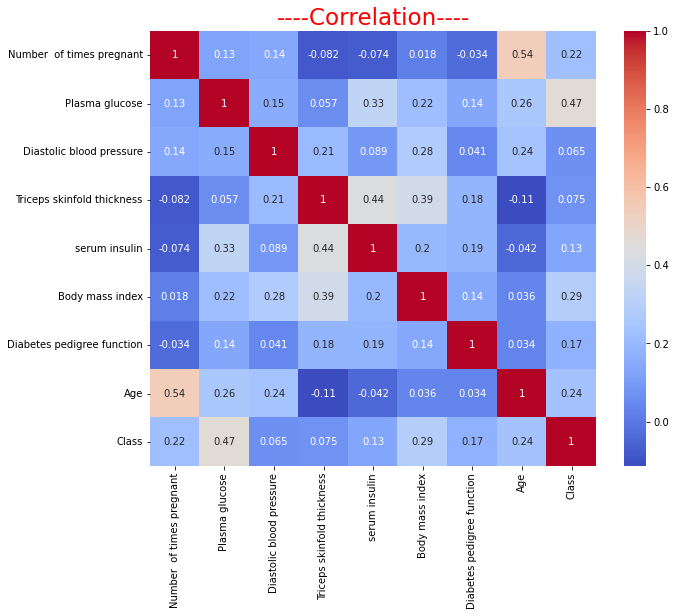

In [10]:
# lets check for any correlation between the data
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(), annot = True, cmap = "coolwarm")
plt.title("----Correlation----", size = 23, color = "r")
plt.show()

## There is very less or no correlation between the data variables

Plotting all the columns using histogram.

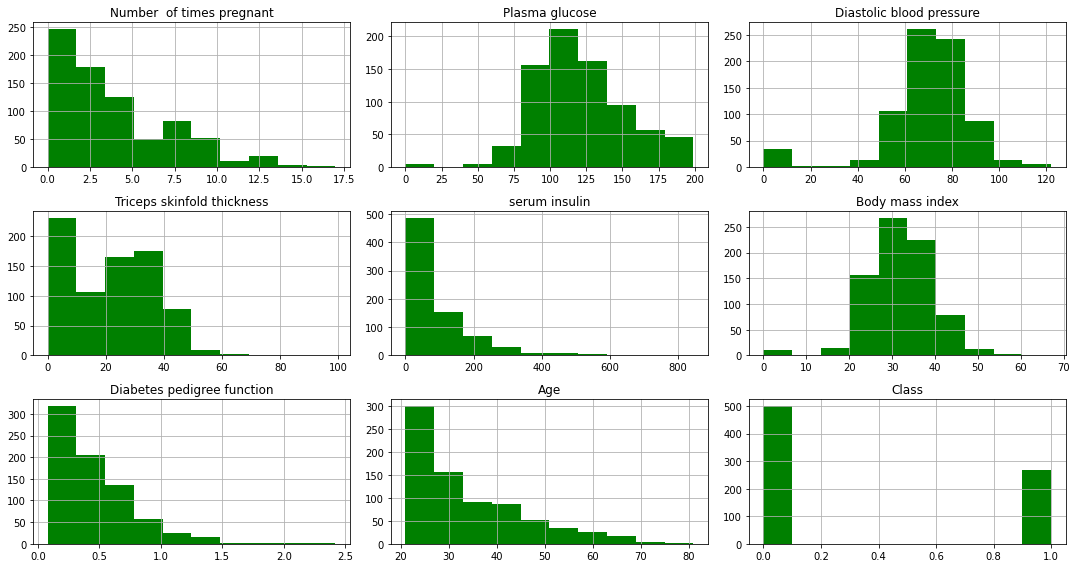

In [ ]:
#plotting All columns by using Histogram
data.hist(figsize = (15,8), color = "g")
plt.tight_layout()
plt.show()

There don't appear to be any obvious data quality issues and few outliers.
We'll need to standardize the features because they're all numerical but on different scales.

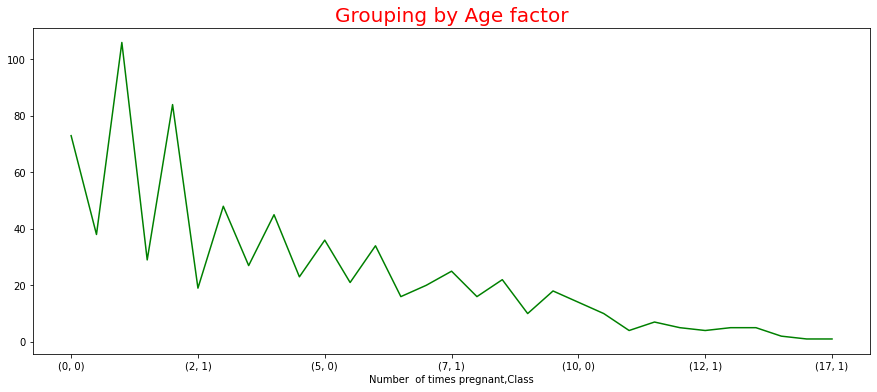

In [11]:
data.groupby(["Number  of times pregnant","Class"])["Age"].count().plot(figsize = (15,6), color = "g")
plt.title("Grouping by Age factor", size = 20, color = "r")
plt.show()

In [12]:
X = data.drop(columns=['Class'])
y = data["Class"]

creating pipeline for scalar and modelling

In [13]:

num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])
modeling_pipeline = Pipeline([("processing_pipeline", num_pipeline), ('regression', LogisticRegression())])

Splitting the data into training/test.


In [14]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [15]:
print(f'Training sample: {X_train.shape[0]:,}')
print(f'Test sample: {x_test.shape[0]:,}')

Training sample: 614
Test sample: 154


In [16]:
print(f'Training sample: {y_train.shape[0]:,}')
print(f'Test sample: {y_test.shape[0]:,}')

Training sample: 614
Test sample: 154


there are 614 training samples. 
there are 154 test samples. 

Logistic regression on the model:

In [17]:

logre=modeling_pipeline.fit(X_train,y_train)
model  = logre.predict(x_test)

#Metric Selected: Accuracy

It is because accuarcy estimates the true positive vales i.e., it predicts 79.8% of the correct diabetic samples.

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(model,y_test)*100)

79.87012987012987


The accuracy of the model is 79.8

Classification report

In [19]:
print(classification_report(model,y_test))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       118
           1       0.56      0.64      0.60        36

    accuracy                           0.80       154
   macro avg       0.72      0.74      0.73       154
weighted avg       0.81      0.80      0.80       154



In [20]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(model,y_test))

[[100  18]
 [ 13  23]]


# Using 10 fold Grid search cross validation and saga as a solver

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

modeling_pipeline = modeling_pipeline = Pipeline([("processing_pipeline", num_pipeline), ('regression', LogisticRegression(penalty = 'l2', solver='saga'))])
param_grid = [{ 'regression__C':[0.1, 1, 10, 100, 1000]}]

cv_result = GridSearchCV(estimator=modeling_pipeline, param_grid=param_grid, scoring='accuracy', cv=10, refit=True)
cv_result = cv_result.fit(X_train, y_train)

In [44]:
cv_result.best_score_

0.7637228979375991

In [45]:
cv_result.best_estimator_

Pipeline(memory=None,
         steps=[('processing_pipeline',
                 Pipeline(memory=None,
                          steps=[('impute_missing',
                                  SimpleImputer(add_indicator=False, copy=True,
                                                fill_value=None,
                                                missing_values=nan,
                                                strategy='median', verbose=0)),
                                 ('standardize_num',
                                  StandardScaler(copy=True, with_mean=True,
                                                 with_std=True))],
                          verbose=False)),
                ('regression',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
 

we've got *76.37* as the accuracy score for the logistic regrssion with added *weights*   

# We got tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2'} 
# accuracy : 76.37

# Using 10 fold Grid search cross validation and liblinear as a solver

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

modeling_pipeline = modeling_pipeline = Pipeline([("processing_pipeline", num_pipeline), ('regression', LogisticRegression(penalty = 'l2', solver='liblinear'))])
param_grid = [{ 'regression__C':[0.1, 1, 10, 100, 1000]}]

cv_result = GridSearchCV(estimator=modeling_pipeline, param_grid=param_grid, scoring='accuracy', cv=10, refit=True)
cv_result = cv_result.fit(X_train, y_train)

In [47]:
cv_result.best_estimator_

Pipeline(memory=None,
         steps=[('processing_pipeline',
                 Pipeline(memory=None,
                          steps=[('impute_missing',
                                  SimpleImputer(add_indicator=False, copy=True,
                                                fill_value=None,
                                                missing_values=nan,
                                                strategy='median', verbose=0)),
                                 ('standardize_num',
                                  StandardScaler(copy=True, with_mean=True,
                                                 with_std=True))],
                          verbose=False)),
                ('regression',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
 

In [48]:
cv_result.best_score_

0.7653622421998942

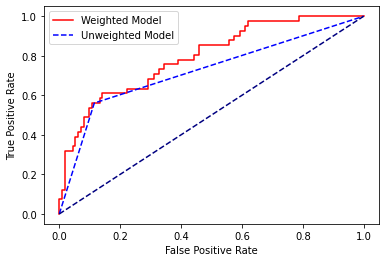

In [53]:
from sklearn.metrics import roc_curve

y_testpr = cv_result.predict_proba(x_test)

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs)
    return fpr, tpr
    
fpr_wgt, tpr_wgt = generate_roc(y_test, y_testpr[:,1])
fpr_base, tpr_base = generate_roc(y_test, model[:])

plt.plot(fpr_wgt, tpr_wgt,'-r')
plt.plot(fpr_base, tpr_base,'--b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Weighted Model','Unweighted Model'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()


# We got tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2'} 
# accuracy : 76.53

#conclusions:
the accuracy of the model was noticed to be 79.8 and  after performing the logestic regression with grid search cross-validation itis  76.53 using liblinear solver and 76.37 using saga solver. It can be concluded that the hyper parameter tuning doesn't improve the model.the accuracy of the model itself is higher.After performing the logestic regression with grid search cross-validation using both solvers it is noticed the the difference between accuracy of both models is almost the same.